In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM,pipeline,AutoModel,MarianMTModel

tokenizer = AutoTokenizer.from_pretrained("./Helsinki-NLP---opus-mt-en-zh")

model = AutoModelForSeq2SeqLM.from_pretrained("./Helsinki-NLP---opus-mt-en-zh")

translation = pipeline("translation",model="./Helsinki-NLP---opus-mt-en-zh",tokenizer="./Helsinki-NLP---opus-mt-en-zh")




d:\anaconda\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\anaconda\envs\ml\lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [2]:

text = "Liangjian is a big city in Yunnan Province"
res = translation(text)[0]['translation_text']
print(res) 



梁建是云南省一个大城市


In [9]:
token=tokenizer(text,return_tensors='pt')
print(token)
res=model.generate(**token)
print(res)
tokenizer.decode(res[0][1:-1])

{'input_ids': tensor([[10327,  6215,  2460,  5105,    32,    13,  3342,  4372,    11, 50944,
         23969, 15573,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
tensor([[65000,     8, 46194,  5974,    72, 15972,  2742,  2850,   311, 38391,
             0]])


'梁建是云南省一个大城市'

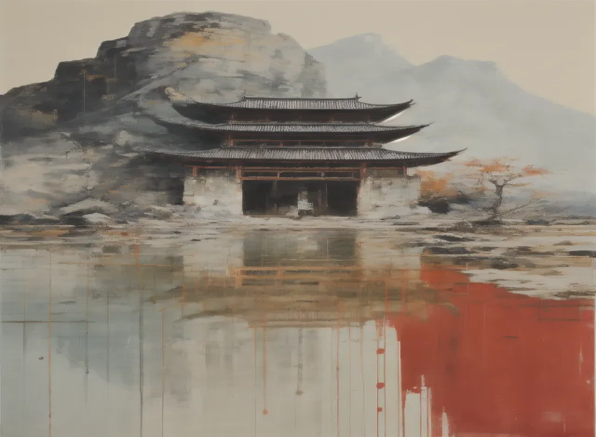

In [72]:
import requests
from PIL import Image

photo= './photo/1.png'
image = Image.open (photo).convert ('RGB')  
display (image.resize ((596, 437)))

In [28]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained ("./blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained ("./blip2-opt-2.7b", torch_dtype=torch.float16)

Loading checkpoint shards: 100%|██████████| 2/2 [00:34<00:00, 17.40s/it]


In [29]:
device = "cuda" if torch.cuda.is_available () else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [66]:
context = [
   ("What about?", "a painting with building or mountain"),
#    ("How is it?", "it is beautiful and colorful")
]
question = "What is specific description?"
template = "Question: {} Answer: {}."
 
prompt = "".join ([template.format (context [i][0], context [i][1]) for i in range (len (context))]) +" Question: "+ question +" Answer:"
 
print (prompt)

Question: What about? Answer: a painting with building or mountain. Question: What is specific description? Answer:


In [76]:
inputs = processor(image, text=prompt, return_tensors="pt").to (device, torch.float16)
prompt="the specific description of the painting is: there"
generated_ids = model.generate (**inputs, max_new_tokens=100)
generated_text = "there "+processor.batch_decode (generated_ids, skip_special_tokens=True)[0].strip ()
print (generated_text)

there is a pagoda in the middle of a lake with a red roof


In [77]:
res = translation(generated_text)[0]['translation_text']
print(res) 

湖中央有一座塔 上面有个红色的屋顶


In [87]:
import torch
import torch.nn as nn

class Image2PoemModel(nn.Module):
    def __init__(self, model1, pipeline2):
        super(Image2PoemModel, self).__init__()
        self.pipeline2 = pipeline2
        self.model1 = model1

    def forward(self, x):       
         # 通过第1个模型进行前向传播
        output1 = self.model1.generate (**x, max_new_tokens=100)
        generated_text = "there "+processor.batch_decode (output1, skip_special_tokens=True)[0].strip ()
        # 通过第2个模型进行前向传播
        output2 = self.pipeline2(generated_text)[0]['translation_text']

        return output2


In [88]:
image2poem = Image2PoemModel(model, translation)
image2poem.to(device)
image2poem.eval()
prompt="the specific description of the painting is: there"
inputs = processor(image, text=prompt, return_tensors="pt").to (device, torch.float16)

image2poem(inputs)

'湖中央有一座塔 上面有个红色的屋顶'

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer,BertConfig
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
BERT_PATH='./BERT_CCPoem_v1/BERT_CCPoem_v1/'
from sklearn.metrics import roc_auc_score, f1_score
import os
import logging

d:\anaconda\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,choices
0,多少征人马上看
1,春日迟迟夜更长
2,人世去千载，泉台归几重。
3,春风旍旗拥万夫
4,不知谁氏国


In [6]:
bert_path="./BERT_CCPoem_v1/BERT_CCPoem_v1"

In [7]:
logging.basicConfig(
    format='%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s', level=logging.INFO)

gpu_list = None
class CustomBERTModel(nn.Module):
    def __init__(self, num_additional_layers=3):
        super(CustomBERTModel, self).__init__()
        # 加载预训练的BERT模型
        self.bert_model = BertModel.from_pretrained(bert_path)
        

    def forward(self, data, cls=False):
        result = []
        # print(data)
        x = data['input_ids']
        y = self.bert_model(x, attention_mask=data['attention_mask'],
                         token_type_ids=data['token_type_ids'])[0]
        # print("y:",y)
        # print("y:",y.shape)
        
        if(cls):
            result = y[:, 0, :].view(y.size(0), -1)
            result = result.cpu().tolist()
        else:
            result = []
            y = y.cpu()
            # y = torch.mean(y, 1)
            # result = y.cpu().tolist()
            # print("**********")
            for i in range(y.shape[0]):
                # 这里的i代表着批处理
                tmp = y[i][1:torch.sum(data['attention_mask'][i]) - 1, :]
                # print("tmp:",tmp.shape)
                result.append(tmp.mean(0).tolist())

        return result
# 创建并初始化模型
custom_bert_model = CustomBERTModel()

# 加载BERT模型的参数字典
bert_state_dict = torch.load('./BERT_CCPoem_v1/BERT_CCPoem_v1/bert_model_params.pth')

# 更新BERT模型的参数
custom_bert_model.bert_model.load_state_dict(bert_state_dict)


<All keys matched successfully>

In [56]:
class BertFormatter():
    def __init__(self, BERT_PATH=bert_path):
        self.tokenizer = BertTokenizer.from_pretrained(BERT_PATH)

    def process(self, data):
        res_dict = self.tokenizer.batch_encode_plus(
            data, pad_to_max_length=True)

        input_list = {'input_ids': torch.LongTensor(res_dict['input_ids']),
                      'attention_mask': torch.LongTensor(res_dict['attention_mask']),
                      "token_type_ids": torch.LongTensor(res_dict['token_type_ids'])}
        return input_list


def init(BERT_PATH=bert_path):
    global gpu_list
    gpu_list = []

    device_list = os.environ.get("CUDA_VISIBLE_DEVICES", "").split(",")
    if(device_list[0] == ""):
        device_list = []
    for a in range(0, len(device_list)):
        gpu_list.append(int(a))

    cuda = torch.cuda.is_available()
    logging.info("CUDA available: %s" % str(cuda))
    if not cuda and len(gpu_list) > 0:
        logging.error("CUDA is not available but specific gpu id")
        raise NotImplementedError

    model = CustomBERTModel(BERT_PATH)
    formatter = BertFormatter(BERT_PATH)
    if len(gpu_list) > 0:
        model = model.cuda()
    if(len(gpu_list) > 1):
        try:
            model.init_multi_gpu(gpu_list)
        except Exception as e:
            logging.warning(
                "No init_multi_gpu implemented in the model, use single gpu instead. {}".format(str(e)))
    return model, formatter


def predict_vec_rep(data, model, formatter):
    data = formatter.process(data)
    model.eval()

    for i in data:
        if(isinstance(data[i], torch.Tensor)):
            if len(gpu_list) > 0:
                data[i] = data[i].cuda()
    # print(data)
    result = model(data)

    return result


def cos_sim(vector_a, vector_b, sim=True):

    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    if(not sim):
        return cos
    sim = 0.5 + 0.5 * cos
    return cos

In [21]:
model, formatter = init()
des1 = predict_vec_rep(["白鹭 天空"], model, formatter)[0]
des2 = predict_vec_rep(["白鹭"], model, formatter)[0]
des3 = predict_vec_rep(["白鹭一行飞越山川，登上碧霄的壮丽景象"], model, formatter)[0]
pom1 = predict_vec_rep(['白鹭一行登碧霄'], model, formatter)[0]
pom2 = predict_vec_rep(["今日方知我是我"], model, formatter)[0]

print(len(des1))
print(cos_sim(des1, pom1),cos_sim(des2, pom1),cos_sim(des3, pom1))
print(cos_sim(des1, pom2),cos_sim(des2, pom2),cos_sim(des3, pom2))

2023-12-30 20:46:47,310 - 1594968516.py[line:26] - INFO: CUDA available: True
d:\anaconda\envs\ml\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


512
0.8488382366081849 0.8187416891929731 0.8563161961781492
0.5662221146091 0.577385699011413 0.6010042519990231


In [59]:
df=pd.read_csv('./BERT_CCPoem_v1/dataprocess/choices.csv')

choices=df['choices'].to_list()
len(choices)

109727

In [60]:
choices[0]

'崖悬百尺古,面削一屏开,晴日流丹草,春风长绿苔'

In [61]:

poem=predict_vec_rep([choices[0]],model,formatter)[0]
len(poem)

d:\anaconda\envs\ml\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


512

In [62]:
embedding_list=[]
for i in range(len(choices)):
    poem=predict_vec_rep([choices[i]],model,formatter)[0]
    embedding_list.append(poem)
    if i%2000 == 0:
        print(i)

embedding_numpy=np.array(embedding_list)
#将二维数组保存到文件
np.save('embedding2.npy', embedding_numpy)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000


In [63]:
len(embedding_list)

109727

In [35]:
embedding_numpy.shape

(84577, 512)

In [65]:
#将二维数组保存到文件
np.save('embedding2.npy', embedding_numpy)

In [66]:
loaded_array = np.load('embedding2.npy')
loaded_array=loaded_array.tolist()
len(loaded_array),len(loaded_array[0])

(109727, 512)

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input="山中央有一座中国寺庙"
input_vector = predict_vec_rep([input], model, formatter)[0]
input_vector = torch.tensor(input_vector).to(device)
matching_library = torch.tensor(loaded_array).to(device)

# 执行点乘操作
similarity_scores = torch.matmul(input_vector, matching_library.t())

# 获取最相似的前十个答案的索引
num=10
top_matches = similarity_scores.topk(k=num).indices
top_matches=torch.randperm(num)[:10]

# 将结果移回CPU（如果需要的话）
top_matches = top_matches.cpu().numpy()
for i in top_matches:
    print(choices[i])

每忆宋夫子,终年坐北轩,著书良自苦,得意好忘言
吟咏霜毛句,闲尝雪水茶,城中展眉处,只是有元家
滴水添壶箭,跳丸叠崦嵫,只夸颜似玉,不觉鬓成丝
红妆夸睡足,粉额趁颜开,惟有江梅样,蛾眉淡拂来
年近古稀有,不易升此堂,他日留泉下,须留姓氏香
仁心均动植,风化正邦家,福庆方骈集,灵符尚辟邪
骤来惊辟易,久视益虚无,咫尺星堪摘,波摇又走珠
屈指归来日,竹桃正著花,还应识故主,烂漫吐红霞
劝酒重持杯,杯深喜不辞,愿将今日意,同保百年期
崖悬百尺古,面削一屏开,晴日流丹草,春风长绿苔


In [47]:
top_matches

array([71000, 42278, 72424, 36078,  1805, 71900, 11638, 53777,   812,
       43051], dtype=int64)

In [15]:
import json
with open('embedding.json', 'w') as file:
    json.dump(embedding_list, file)

KeyboardInterrupt: 

In [1]:
from image_process import image_to_poem

image_to_poem('../photo/1.png')

d:\anaconda\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\anaconda\envs\ml\lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


'湖中央有一座塔 上面有个红色的屋顶'

In [2]:
from BERTMatching import translation_to_poem

translation_to_poem('湖中央有一座塔 上面有个红色的屋顶')

d:\anaconda\envs\ml\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


['红妆夸睡足,粉额趁颜开,惟有江梅样,蛾眉淡拂来',
 '劝酒重持杯,杯深喜不辞,愿将今日意,同保百年期',
 '骤来惊辟易,久视益虚无,咫尺星堪摘,波摇又走珠',
 '每忆宋夫子,终年坐北轩,著书良自苦,得意好忘言',
 '仁心均动植,风化正邦家,福庆方骈集,灵符尚辟邪',
 '崖悬百尺古,面削一屏开,晴日流丹草,春风长绿苔',
 '滴水添壶箭,跳丸叠崦嵫,只夸颜似玉,不觉鬓成丝',
 '吟咏霜毛句,闲尝雪水茶,城中展眉处,只是有元家',
 '屈指归来日,竹桃正著花,还应识故主,烂漫吐红霞',
 '年近古稀有,不易升此堂,他日留泉下,须留姓氏香']